In [ ]:
!pip install astroquery astropy


In [ ]:
!pip install scipy


In [131]:
!pip install PyQt5

  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)
  Obtaining dependency information for PyQt5-sip<13,>=12.11 from https://files.pythonhosted.org/packages/cf/68/c6624672535b91001649916a47047b19f2a387efe78d3063e7e1e4deb10a/PyQt5_sip-12.12.2-cp38-cp38-win_amd64.whl.metadata
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
   ---------------------------------------- 78.2/78.2 kB 1.1 MB/s eta 0:00:00


In [5]:
!pip install h5py


  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/02/2b/d88fb8f5c33c50d71b65aab8f69d7abd3c2be4cfd18bd4829ff2586665ce/h5py-3.9.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 2.7/2.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
estrella_objetivo = "Sirius"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return xid
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado=descargar_y_visualizar_espectro(ra, dec)


In [ ]:
xidDescargado[1]

In [ ]:
from astropy.modeling import models, fitting
from scipy.signal import find_peaks

def medir_redshift(espectro):
    # Cargar los datos del espectro FITS
    wavelength = 10 ** espectro.data['loglam']
    flux = espectro.data['flux']

    # Identificar picos en el espectro (líneas espectrales)
    picos_indices, _ = find_peaks(flux, height=100)

    # Obtener las longitudes de onda de los picos identificados
    picos_longitudes = wavelength[picos_indices]

    # Usar un modelo gaussiano para ajustar las líneas espectrales
    fitter = fitting.LevMarLSQFitter()
    gaussian_model = models.Gaussian1D()
    fit_result = fitter(gaussian_model, picos_longitudes, flux[picos_indices])

    # Calcular el redshift utilizando el desplazamiento Doppler
    redshift_medido = fit_result.mean.value / 1215.67 - 1

    return redshift_medido


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from astropy.io import fits

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=20):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0][1]  # Obtenemos los datos del espectro
        flux = spectrum.data['flux']
        wavelength = 10 ** spectrum.data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return spectrum
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")
        return None



if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 185.72945
    dec = 15.82290

    # Llamada a la función para descargar y visualizar el espectro
    descargar_y_visualizar_espectro(ra, dec)

    if espectro_descargado is not None:
        # Llamar a la función para medir el redshift
        redshift_medido = medir_redshift(espectro_descargado)
        print("Redshift medido:", redshift_medido)


In [ ]:
from astropy.modeling import models, fitting
from scipy.signal import find_peaks

def medir_redshift(espectro):
    # Cargar los datos del espectro FITS
    wavelength = 10 ** espectro.data['loglam']
    flux = espectro.data['flux']

    # Identificar picos en el espectro (líneas espectrales)
    picos_indices, _ = find_peaks(flux, height=100)

    # Obtener las longitudes de onda de los picos identificados
    picos_longitudes = wavelength[picos_indices]

    # Usar un modelo gaussiano para ajustar las líneas espectrales
    fitter = fitting.LevMarLSQFitter()
    gaussian_model = models.Gaussian1D()
    fit_result = fitter(gaussian_model, picos_longitudes, flux[picos_indices])

    # Calcular el redshift utilizando el desplazamiento Doppler
    redshift_medido = fit_result.mean.value / 1215.67 - 1

    return redshift_medido


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from astropy.table import Table, MaskedColumn, vstack

def plot_spectra(wavelength, flux):
    # Función para visualizar el espectro
    plt.figure(figsize=(10, 5))
    plt.plot(wavelength, flux, lw=0.5)
    plt.xlabel("Wavelength ($\AA$)")
    plt.ylabel("Flux")
    plt.title("SDSS Spectrum")
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=20, spec_hdus=None):
    if spec_hdus is None:
        # Realizar una consulta a SDSS para obtener los datos del espectro
        xid = SDSS.query_region(coords.SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs'), spectro=True)

        if xid is None or len(xid) == 0:
            print("No se encontró ningún espectro para las coordenadas especificadas.")
            return

        spec_hdus = SDSS.get_spectra(matches=xid)

    flux_list = []
    wavelength_list = []
    for spec_hdu in spec_hdus:
        spectrum = spec_hdu[1].data
        flux = spectrum['flux']
        wavelength = 10 ** spectrum['loglam']  # Convertir log(lambda) a lambda
        flux_list.append(flux)
        wavelength_list.append(wavelength)

    # Encontrar el índice del espectro cuyas coordenadas coinciden con las coordenadas de la estrella
    idx = np.where((xid['ra'] == ra) & (xid['dec'] == dec))[0]

    if len(idx) > 0:
        idx = idx[0]  # Tomar solo el primer índice si hay múltiples coincidencias
        plot_spectra(wavelength_list[idx], flux_list[idx])
    else:
        print("No se encontró ningún espectro para las coordenadas especificadas.")

# Coordenadas RA y Dec de la estrella (ejemplo)
ra = 185.72945
dec = 15.82290

# Llamada a la función para descargar y visualizar el espectro
descargar_y_visualizar_espectro(ra, dec)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return xid
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado=descargar_y_visualizar_espectro(ra, dec)


In [ ]:
# Acceder a la primera fila de la tabla (índice 0)
primer_objeto = xidDescargado[0]

# Obtener el valor de las coordenadas RA y Dec del primer objeto
ra_primer_objeto = primer_objeto['ra']
dec_primer_objeto = primer_objeto['dec']

print("RA del primer objeto:", ra_primer_objeto)
print("Dec del primer objeto:", dec_primer_objeto)


In [ ]:
# Obtener todos los valores de las coordenadas RA y Dec de todos los objetos
todas_las_ra = xidDescargado['ra']
todas_las_dec = xidDescargado['dec']

print("Todas las RA:", todas_las_ra)
print("Todas las Dec:", todas_las_dec)


In [ ]:
xidDescargado
# Obtener el índice del primer elemento (índice 0)
indice_a_eliminar = 0

# Crear una nueva tabla excluyendo el elemento con el índice especificado
nueva_tabla = xidDescargado.copy()
nueva_tabla.remove_rows(indice_a_eliminar)

# La nueva tabla no contendrá el elemento que eliminaste
nueva_tabla

In [ ]:
# Seleccionar el primer elemento de la tabla
primer_elemento = xidDescargado[0]


In [ ]:
xidDescargado[0]

In [ ]:
primer_elemento

In [ ]:
j_spectra = SDSS.get_spectra(matches=nueva_tabla)
spectrum = j_spectra[0]

# Obtener los datos del espectro
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

# Visualizar el espectro
plot_spectra(wavelength, flux)

In [ ]:
j_spectra = SDSS.get_spectra(matches=primer_elemento)
spectrum = j_spectra[0]

# Obtener los datos del espectro
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

# Visualizar el espectro
plot_spectra(wavelength, flux)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(xid_element, radius=10):
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(coords.SkyCoord(ra=xid_element['ra']*u.deg, dec=xid_element['dec']*u.deg, frame='icrs'), spectro=True, radius=radius*u.arcsec)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado = descargar_y_visualizar_espectro(xidDescargado[0])  # Pasar solo el primer elemento de la tabla


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
        return xid
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado=descargar_y_visualizar_espectro(ra, dec)


In [ ]:
xidDescargado
# Obtener el índice del primer elemento (índice 0)
indice_a_eliminar = 0

# Crear una nueva tabla excluyendo el elemento con el índice especificado
nueva_tabla = xidDescargado.copy()
nueva_tabla.remove_rows(indice_a_eliminar)

# La nueva tabla no contendrá el elemento que eliminaste
nueva_tabla

In [ ]:
j_spectra = SDSS.get_spectra(matches=nueva_tabla)
print(nueva_tabla)
spectrum = j_spectra[0]

# Obtener los datos del espectro
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

# Visualizar el espectro
plot_spectra(wavelength, flux)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(xid_element, radius=10):
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(coords.SkyCoord(ra=xid_element['ra']*u.deg, dec=xid_element['dec']*u.deg, frame='icrs'), spectro=True, radius=radius*u.arcsec)
    print(xid)
    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        spectrum = j_spectra[0]

        # Obtener los datos del espectro
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el espectro
        plot_spectra(wavelength, flux)
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado_1 = descargar_y_visualizar_espectro(xidDescargado[0])  # Pasar solo el primer elemento de la tabla
    xidDescargado_2 = descargar_y_visualizar_espectro(xidDescargado[1])
     # Pasar solo el primer elemento de la tabla


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
from scipy.interpolate import interp1d

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(xid_element, radius=10):
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(coords.SkyCoord(ra=xid_element['ra']*u.deg, dec=xid_element['dec']*u.deg, frame='icrs'), spectro=True, radius=radius*u.arcsec)
    print(xid)
    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)

        # Obtener los datos del primer espectro
        spectrum = j_spectra[0]
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

        # Visualizar el primer espectro
        plot_spectra(wavelength, flux)

        # Si existe el segundo espectro, realizar la interpolación y ploteo de la diferencia
        if len(j_spectra) > 1:
            spectrum_2 = j_spectra[1]
            flux_2 = spectrum_2[1].data['flux']
            wavelength_2 = 10 ** spectrum_2[1].data['loglam']

            # Interpolar el segundo espectro para que tenga la misma longitud de onda que el primero
            f_interp = interp1d(wavelength_2, flux_2, kind='linear', bounds_error=False, fill_value=0.0)
            flux_interp = f_interp(wavelength)

            # Calcular la diferencia entre los espectros
            difference_flux = flux - flux_interp

            # Visualizar la diferencia
            plot_spectra(wavelength, difference_flux)

    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    xidDescargado_1 = descargar_y_visualizar_espectro(xidDescargado[0])  # Pasar solo el primer elemento de la tabla
    xidDescargado_2 = descargar_y_visualizar_espectro(xidDescargado[1])  # Si existe, pasar el segundo elemento


In [ ]:
j_spectra = SDSS.get_spectra(matches=xidDescargado)
print(len(j_spectra))
n_spec=1
spectrum = j_spectra[n_spec]
flux = spectrum[1].data['flux']
wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda
def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    plt.title("1")
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()
# Visualizar el primer espectro
plot_spectra(wavelength, flux)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()

def descargar_y_visualizar_espectro(ra, dec, radius=10,n_spec=0):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid
    print(xid)

    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        print(len(j_spectra))
        spectrum = j_spectra[n_spec]
        flux = spectrum[1].data['flux']
        wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda
        def plot_spectra(wavelength, flux):
            # Configuración de los gráficos
            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(wavelength, flux, '-k', lw=1)
            ax.set_xlim(np.min(wavelength), np.max(wavelength))
            plt.title("Spectro :"+str(n_spec))
            ax.set_xlabel(r'Longitud de onda $(\AA)$')
            ax.set_ylabel(r'Flujo')
            plt.show()
        # Visualizar el primer espectro
        plot_spectra(wavelength, flux)
        return xid,j_spectra
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 165.24045
    dec = -0.88458

    # Llamada a la función para descargar y visualizar el espectro
    # for each in len(j)
    xidDescargado,j_spectra=descargar_y_visualizar_espectro(ra, dec,radius=100,n_spec=3)


## USANDO DATOS DE MAST MISLKULKI ARCHIVE 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
def plot_spectra(wavelength, flux):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    plt.show()
def descargar_y_visualizar_espectro(ra, dec, radius=10, n_spec=0):
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    obs_table = Observations.query_region(pos, radius=radius*u.arcsec)
    if obs_table is not None and len(obs_table) > 0:
        product_list = Observations.get_product_list(obs_table[n_spec])
        product_list = product_list['obsID'][0]  # Obtener el primer elemento de la columna 'obsID'
        spectrum = Observations.download_products(product_list, download_dir='.')
        spectrum_data = spectrum[0].data
        flux = spectrum_data['FLUX']
        wavelength = 10 ** spectrum_data['loglam']  # Los datos del SDSS usan el logaritmo de la longitud de onda
        plot_spectra(wavelength, flux)
        return obs_table, spectrum
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")
if __name__ == "__main__":
    ra = 165.24045
    dec = -0.88458
    obs_table, spectrum = descargar_y_visualizar_espectro(ra, dec, radius=10)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
ra = 165.24045
dec = -0.88458
radius=0.2
pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
obs_table = Observations.query_region(pos, radius=radius*u.arcsec)
product_list = Observations.get_product_list(obs_table)
collections = np.unique(product_list['obs_collection'])
print(collections)
dataproduct_type	 = np.unique(product_list['dataproduct_type'])
print(dataproduct_type)
product_list=product_list[product_list["obs_collection"]=='HLSP']
product_list=product_list[1]
product_list
spectrum = Observations.download_products(product_list, download_dir='.')

obs_collection
--------------
         GALEX
          HLSP
           PS1
          TESS
dataproduct_type
----------------
           image


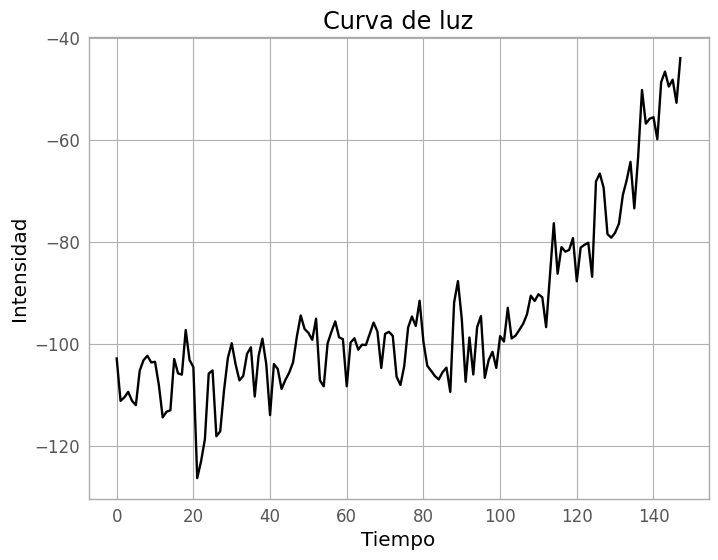

In [76]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[2].data
hdul.close()

# Obtener los tiempos de cada medición (esto es solo un ejemplo, ajusta según tus datos)
tiempos = range(image_data.shape[2])

# Visualizar la curva de luz
plt.figure()
plt.plot(tiempos, image_data[5, 5, :], '-k')  # Aquí asumimos una posición específica (0, 0), ajusta según tus datos
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.title('Curva de luz')
plt.show()


Filename: mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    217   1154R x 8C   [D, D, E, 24A, 24A, E, K, K]   
  2                1 ImageHDU       201   (148, 104, 1154)   float32   
  3                1 ImageHDU         8   (148, 104, 1154)   float32   


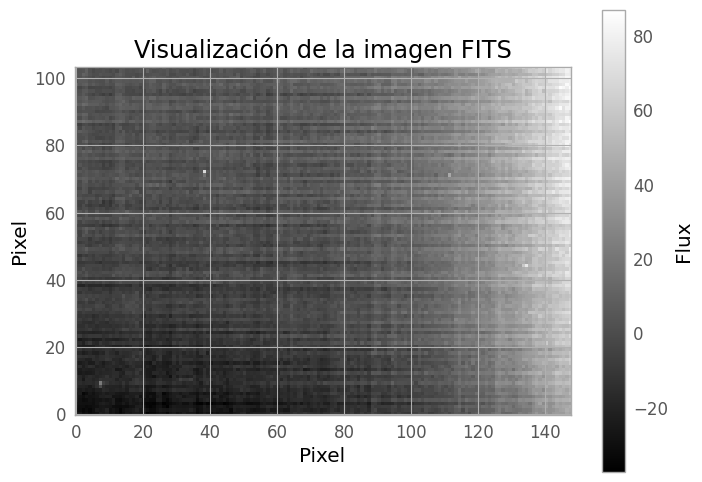

In [107]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
fits.info(archivo_fits)
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[2].data
hdul.close()

# Visualizar la imagen bidimensional
plt.figure()
image_data=(image_data[0]+image_data[1]+image_data[2]-image_data[3])/4
# sum_image = np.sum(image_data)



plt.imshow(image_data, cmap='gray', origin='lower')  # Utilizamos 'origin=lower' para corregir la orientación de la imagen
plt.colorbar(label='Flux')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.title('Visualización de la imagen FITS')
plt.show()

Filename: mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    217   1154R x 8C   [D, D, E, 24A, 24A, E, K, K]   
  2                1 ImageHDU       201   (148, 104, 1154)   float32   
  3                1 ImageHDU         8   (148, 104, 1154)   float32   


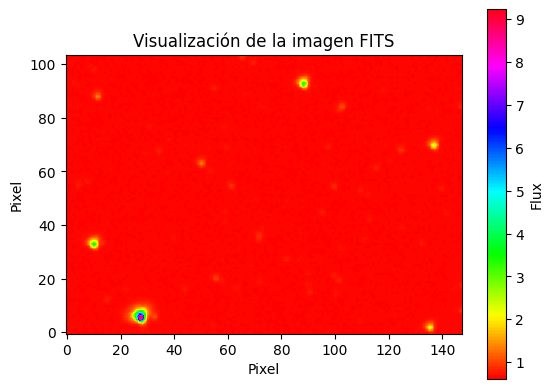

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
fits.info(archivo_fits)
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[3].data
hdul.close()
len(image_data)
image_datax=image_data[0]
for each in range(len(image_data)):
    image_datax = image_datax+image_data[each]
image_data=image_datax/len(image_data)

plt.figure()
plt.imshow(image_data, cmap='hsv', origin='lower')  # Utilizamos 'origin=lower' para corregir la orientación de la imagen
plt.colorbar(label='Flux')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.title('Visualización de la imagen FITS')
plt.show()


SystemExit: 0

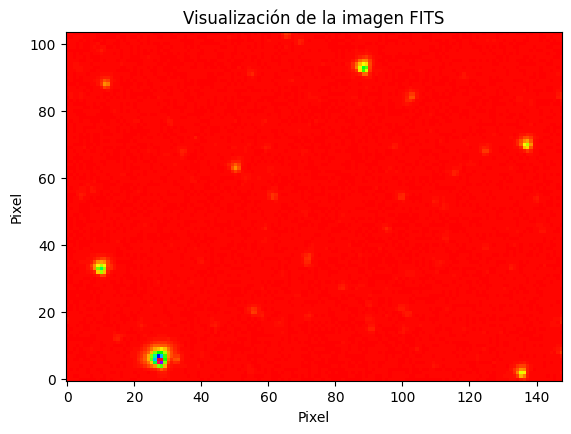

In [4]:
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget, QLabel
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'

# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[3].data
hdul.close()

# Calcular la imagen promedio
image_data_avg = image_data.mean(axis=0)

class ImageViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Visor de Imágenes FITS')

        # Crear el lienzo de la figura y mostrar la imagen FITS en él
        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)
        self.ax = self.figure.add_subplot(111)
        self.ax.imshow(image_data_avg, cmap='hsv', origin='lower')  # Utilizamos 'origin=lower' para corregir la orientación de la imagen
        self.ax.set_xlabel('Pixel')
        self.ax.set_ylabel('Pixel')
        self.ax.set_title('Visualización de la imagen FITS')

        # Conectar la función onclick al evento de clic en el lienzo
        self.canvas.mpl_connect('button_press_event', self.onclick)

        # Crear el QLabel para mostrar las coordenadas del clic
        self.label = QLabel(self)
        self.label.setText('Coordenadas del clic: ')

        # Crear el diseño vertical y agregar el lienzo y el QLabel al widget principal
        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.label)

        # Crear el widget principal y establecer el diseño
        main_widget = QWidget(self)
        main_widget.setLayout(layout)
        self.setCentralWidget(main_widget)

    def onclick(self, event):
        if event.xdata is not None and event.ydata is not None:
            x_coord = event.xdata
            y_coord = event.ydata
            self.label.setText(f'Coordenadas del clic: x={x_coord:.2f}, y={y_coord:.2f}')

if __name__ == '__main__':
    app = QApplication(sys.argv)
    viewer = ImageViewer()
    viewer.show()
    sys.exit(app.exec_())


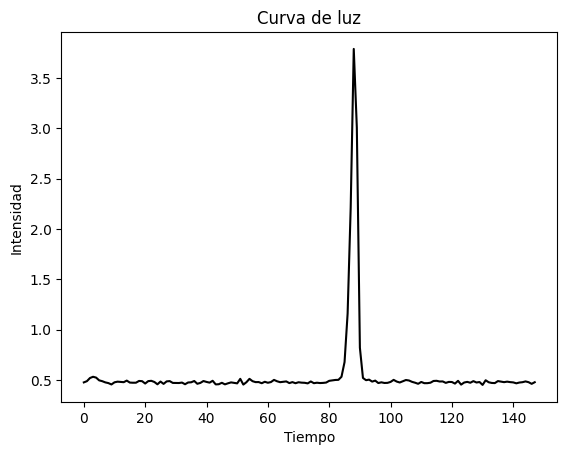

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Nombre del archivo FITS que deseas visualizar
archivo_fits = 'mastDownload\\HLSP\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc\\hlsp_eleanor_tess_ffi_postcard-s0009-1-4-cal-0902-0106_tess_v2_pc.fits'
# Obtener los datos del archivo FITS
hdul = fits.open(archivo_fits)
image_data = hdul[3].data
hdul.close()

# Obtener los tiempos de cada medición (esto es solo un ejemplo, ajusta según tus datos)
tiempos = range(image_data.shape[2])

# Visualizar la curva de luz
plt.figure()
plt.plot(tiempos, image_data[88, 93, :], '-k')  # Aquí asumimos una posición específica (0, 0), ajusta según tus datos
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.title('Curva de luz')
plt.show()
